# Random Forest

**Decision trees are the Machine Learning models used to make predictions by going through each and every feature in the data set, one-by-one.

**Random forests on the other hand are a collection of decision trees being grouped together and trained together that use random orders of the features in the given data sets.**

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.
Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

**Ensemble simply means combining multiple models. Thus a collection of models is used to make predictions rather than an individual model.**
Ensemble uses two types of methods:

1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.
2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

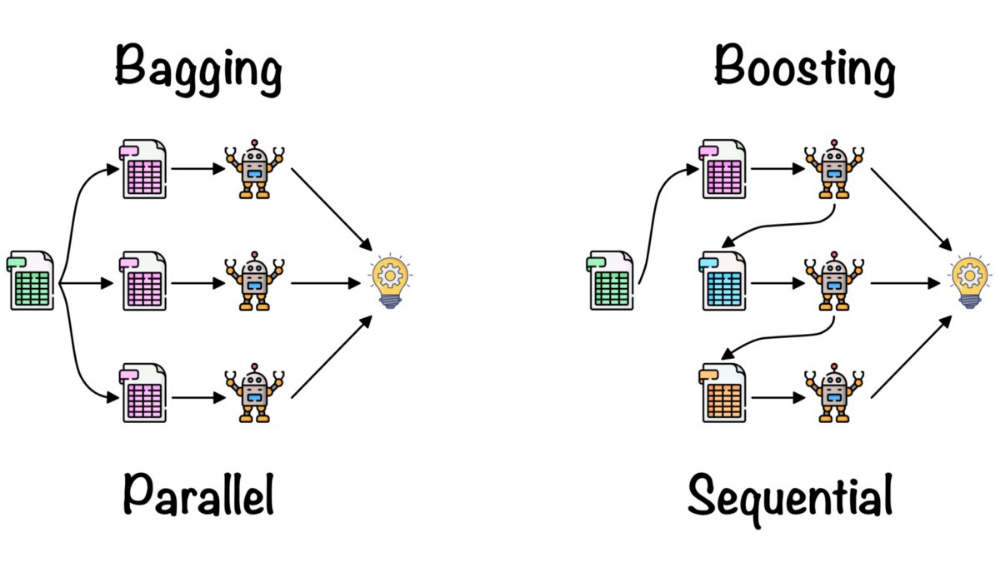
# Bootstrapping :
Boost strapping is a process of creating a subset of data from the original data. There are several flavors of this


# Bagging
Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.
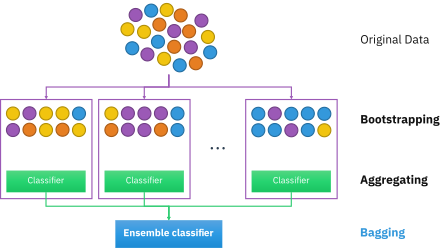
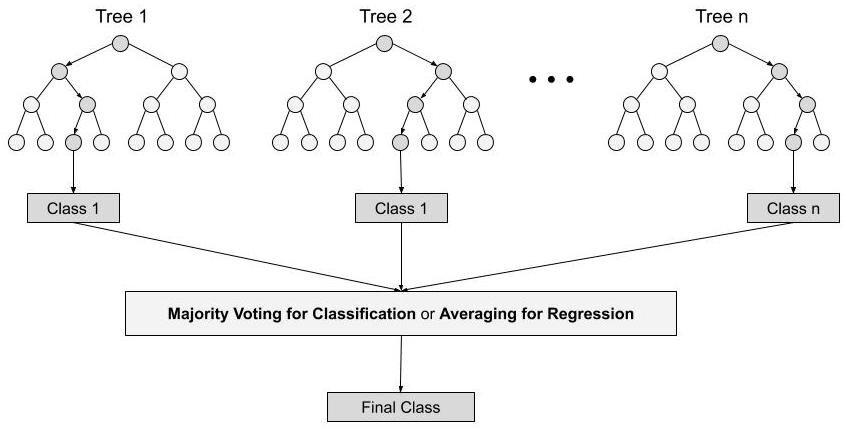
When samples are drawn with replacement, then the method is known as Bagging.
So Bagging is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

    Multiple subsets are created from the original dataset, selecting observations with replacement.
    A base model (weak model) is created on each of these subsets.
    The models run in parallel and are independent of each other.
    The final predictions are determined by combining the predictions from all the models

# Boosting
Boosting technique is a sequential process, where each model tries to correct the errors of the previous model. The succeeding models are dependent on the previous model.

It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example, ADA BOOST, XG BOOST.

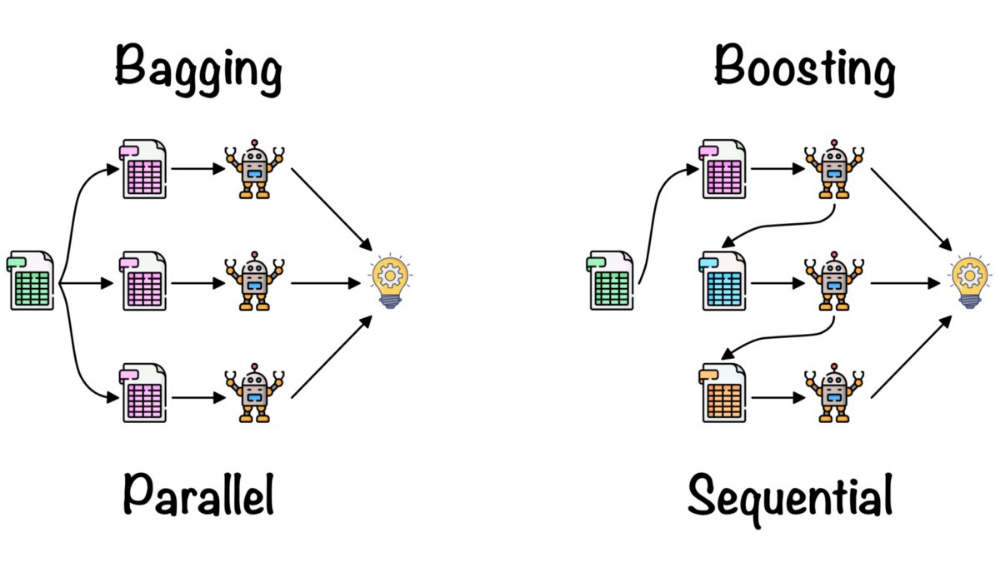
**Random forest works on the bagging principle**
we need to know one more important thing that when we grow our decision tree to its depth we get Low Bias and High Variance, we can say that our model will perform perfectly on our training dataset, but it’ll suck when our new datapoint comes into the picture. To tackle this high variance situation, we use random forest where we are combining many decision trees and not just depending on a single DT, this will allow us to lower our variance, and this way we overcome our overfitting problem.

# OOB (Out of the bag) Evaluation
We now know how bootstrapping works in random forests. It basically does row sampling and feature sampling with a replacement before training the model. Since sampling is done with replacement, about one-third of the data is not used to train the model and this data is called out of the bag samples. We can evaluate our model on these out-of-bag data points to know how it will perform on the test dataset. 
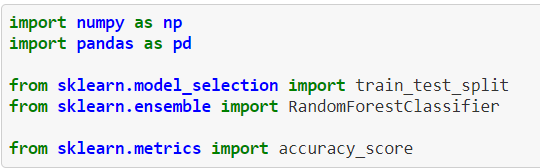
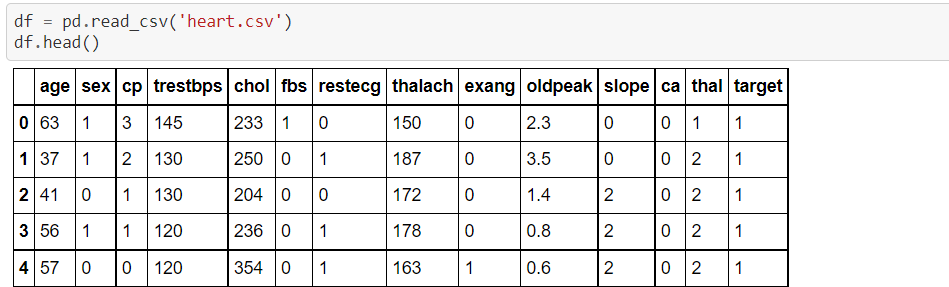
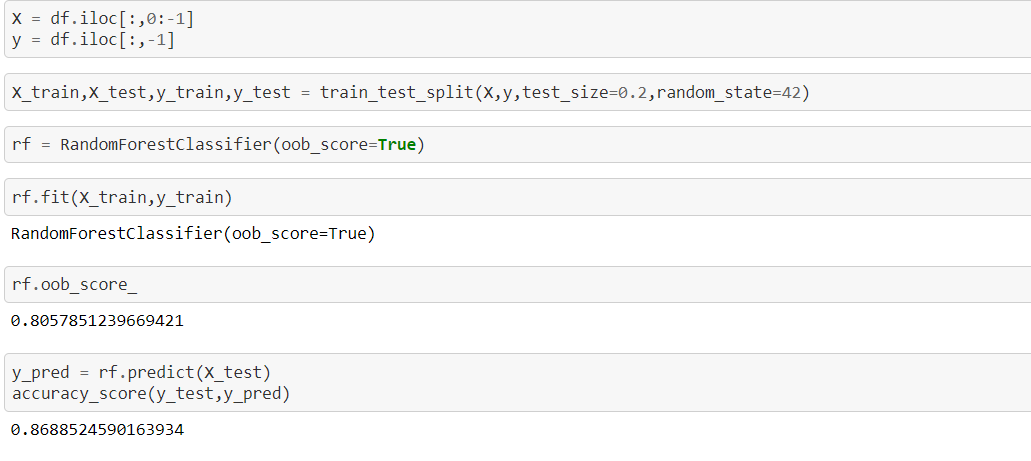

To get the oob evaluation we need to set a parameter called oob_score to TRUE. We can see that the score we get from oob samples, and the test dataset is somewhat the same. In this way, we can use these left-out samples in evaluating our model.
# Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.
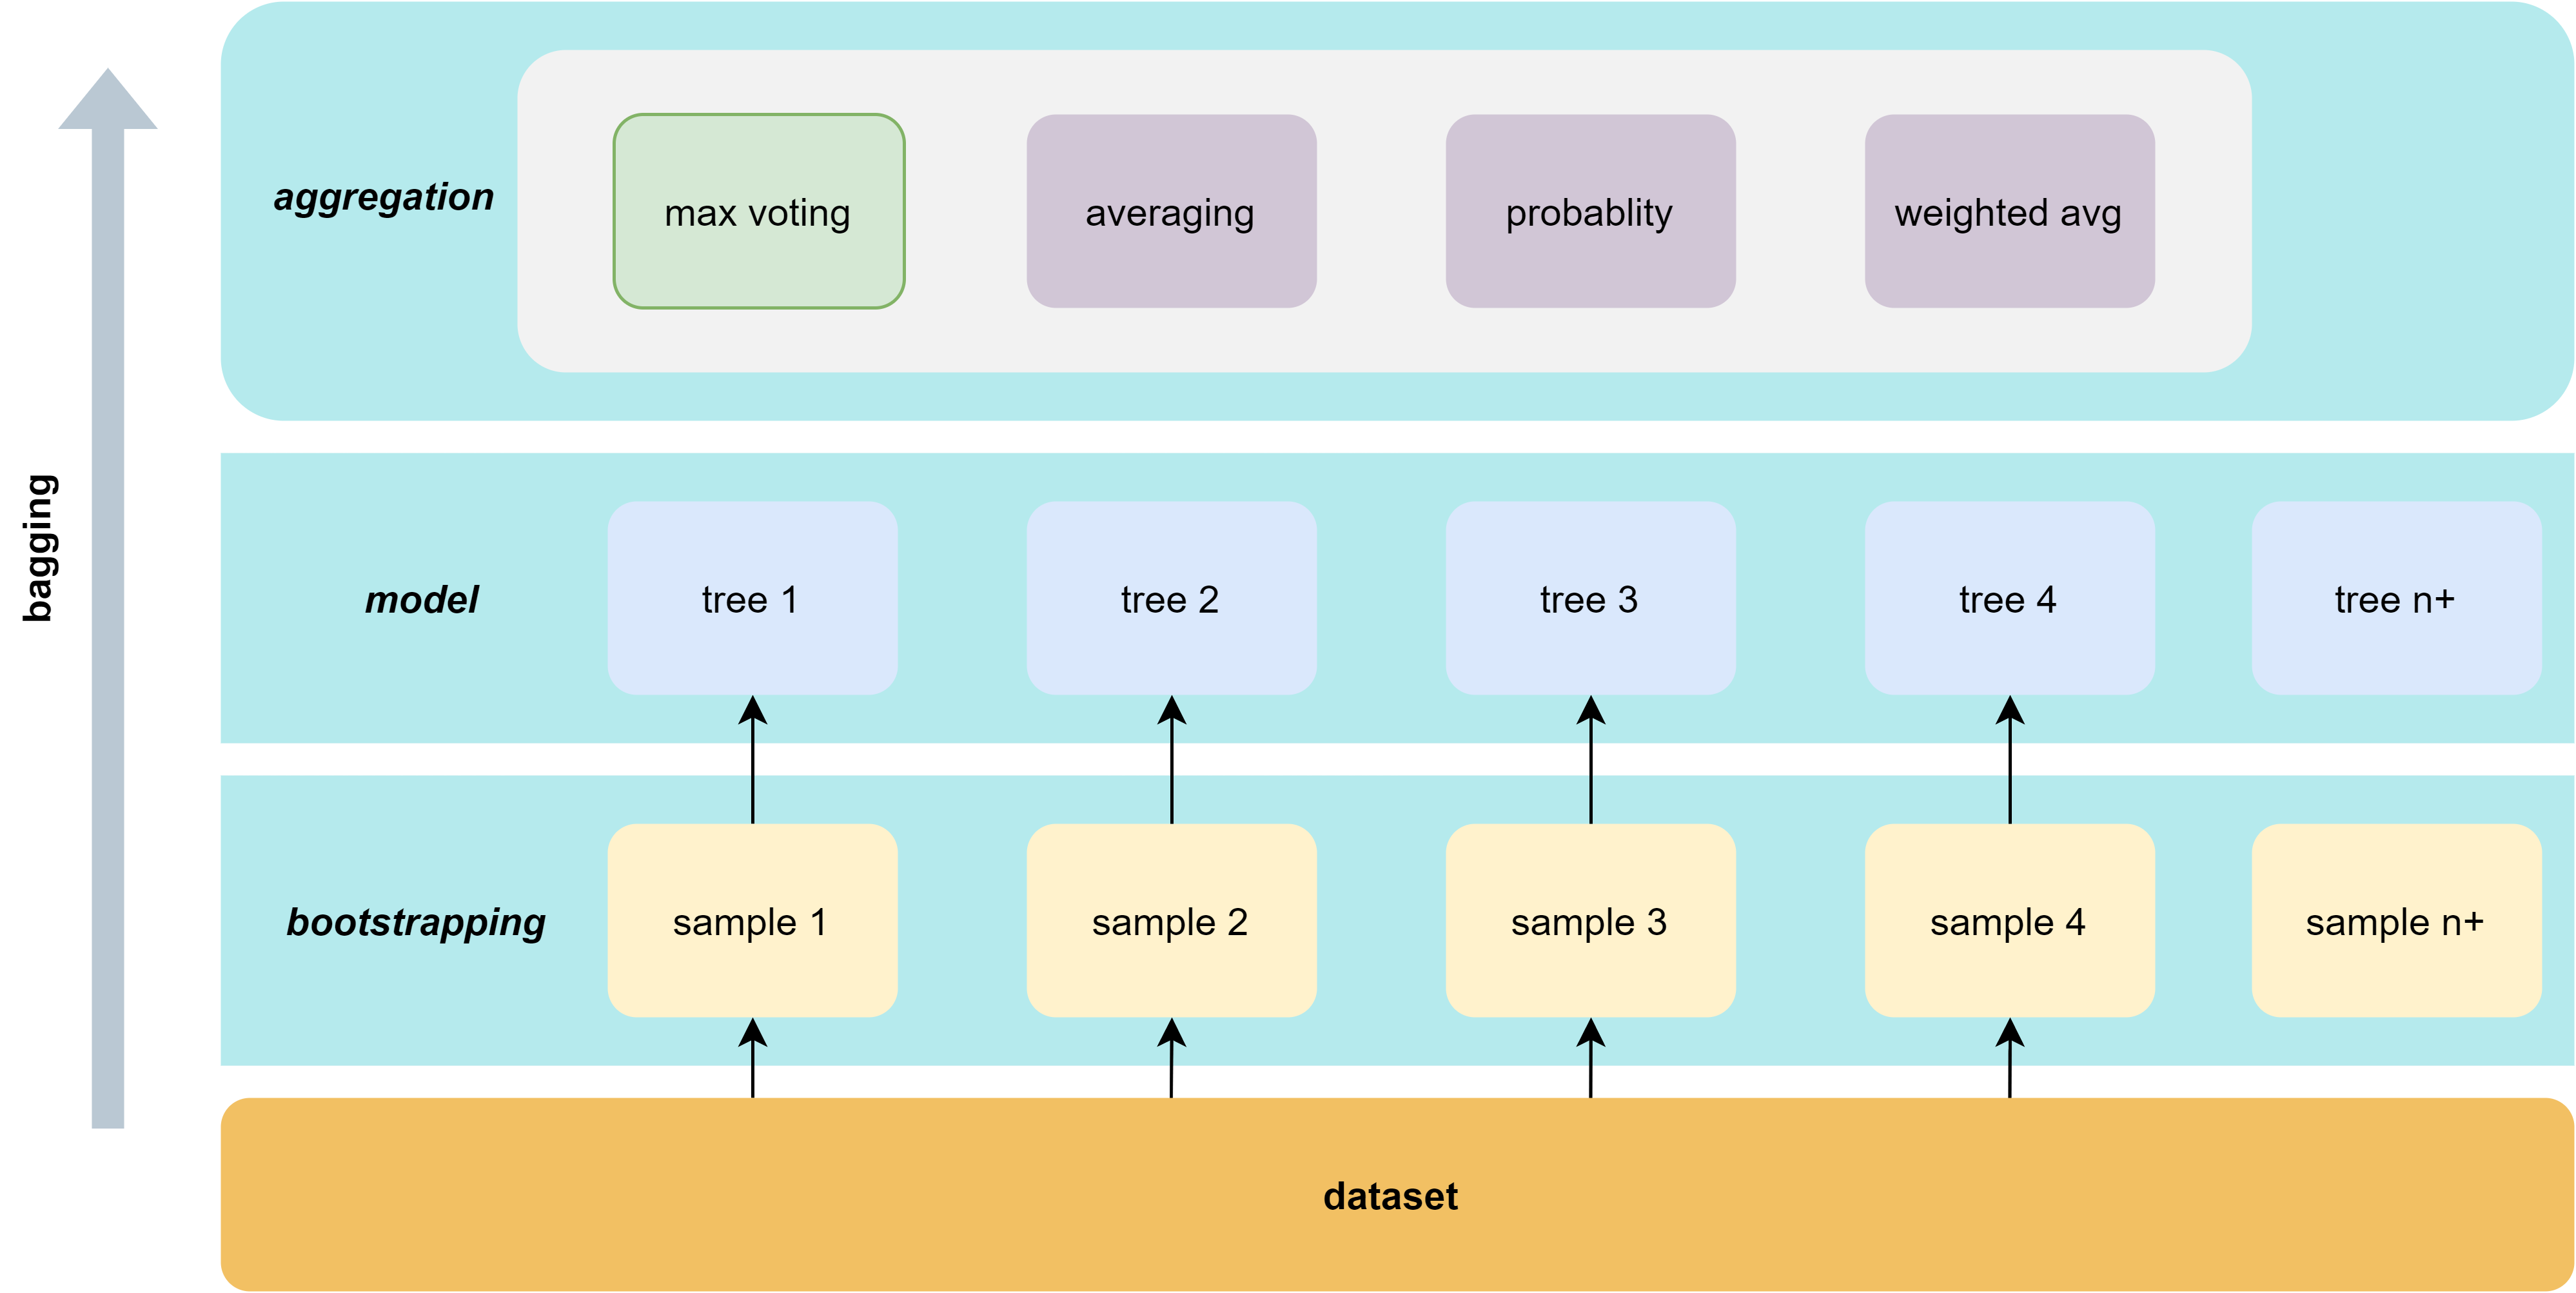
**Source:-https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/
          https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
          
Since Random Forest is an ensemble of many decision trees, many of the hyperparameters between both models are shared.
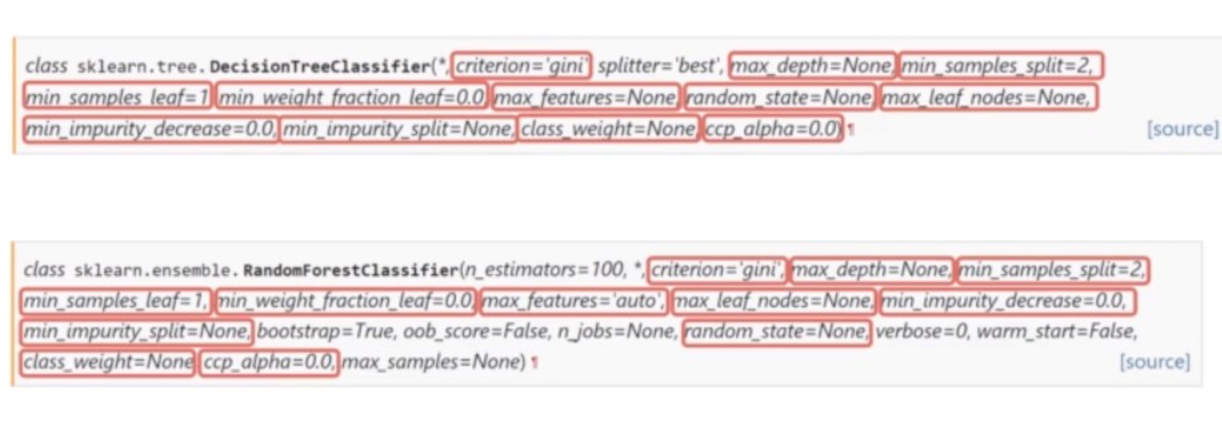
Below are the additional hyperparameter provided in Random Forest.
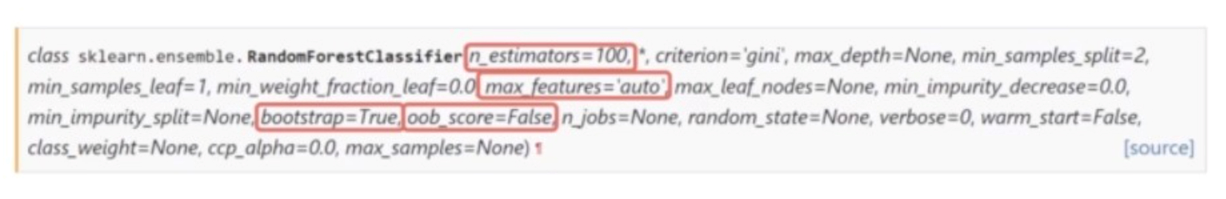
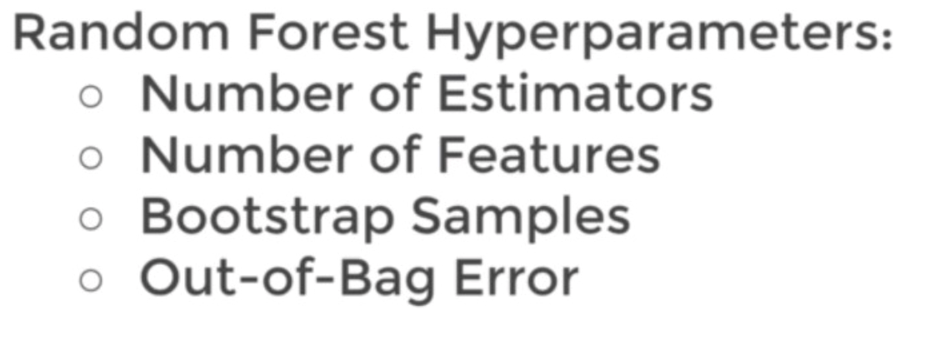
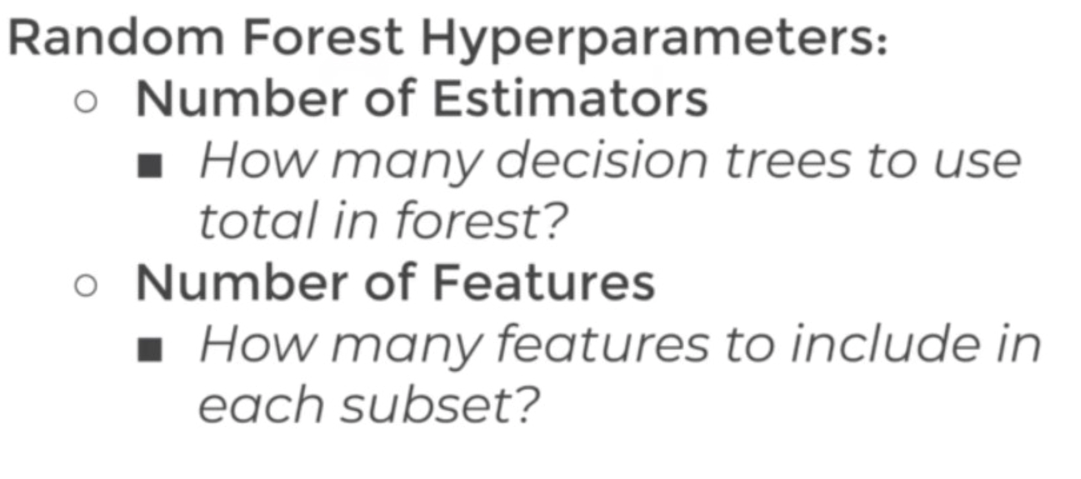
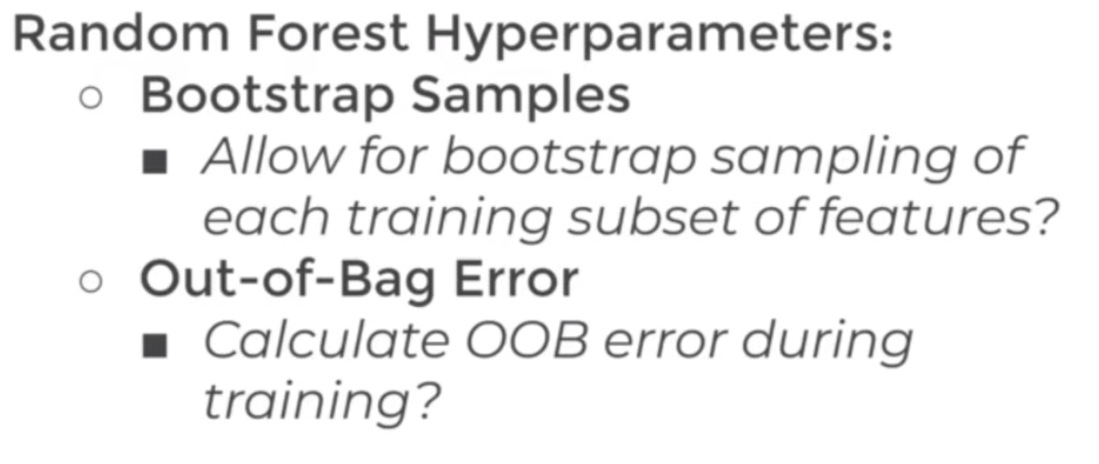
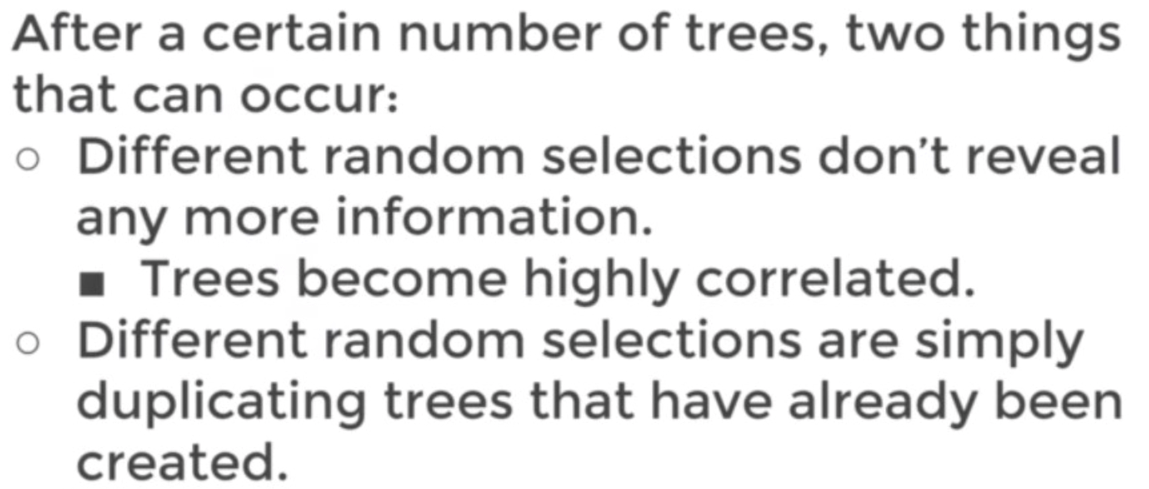
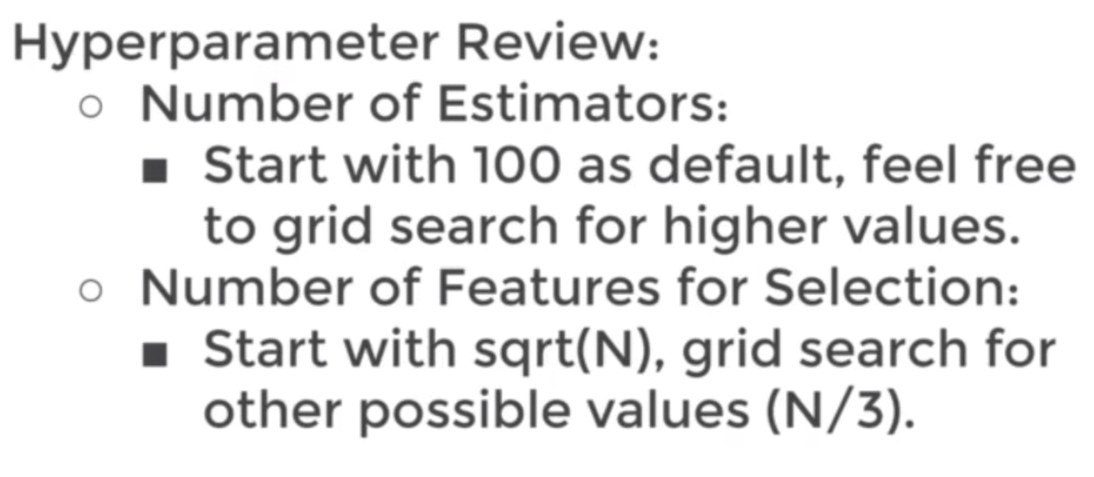
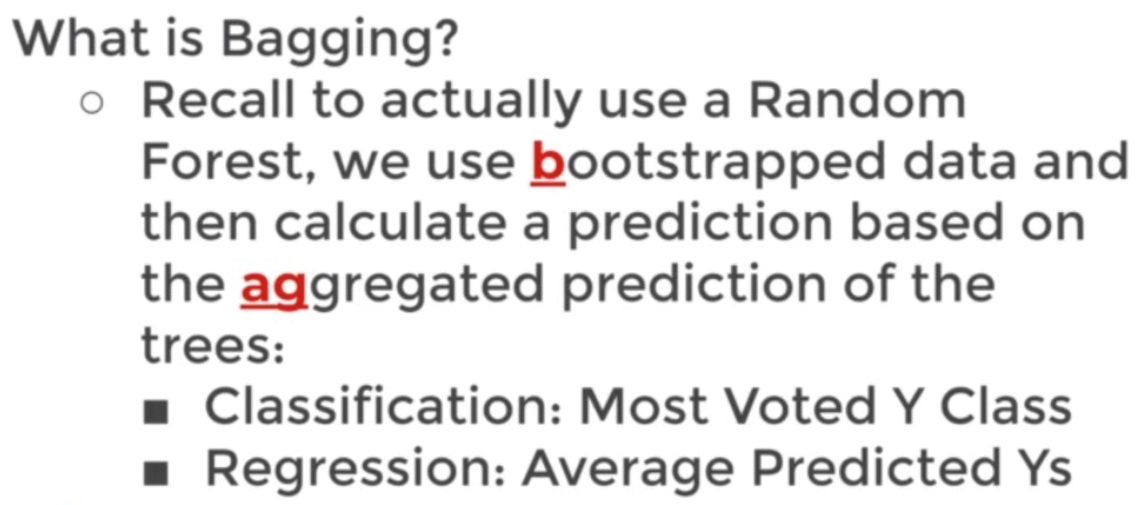


# Random Forest - Classification

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split                                                    #distributing data
from sklearn.ensemble import RandomForestClassifier                                                     #model used   
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score #Accuracy check 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df= pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


Use Random Forest to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
df.Undergrad.unique()

array(['NO', 'YES'], dtype=object)

In [8]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [9]:
df.Urban.unique()

array(['YES', 'NO'], dtype=object)

In [10]:
result=[]
for val in df['Taxable.Income']:
    if (val<=30000):
        result.append('Risky')
    else:
        result.append('Good')

In [11]:
df['tax_group']=result

In [12]:
df.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_group
590,NO,Married,43018,85195,14,YES,Good
591,YES,Single,27394,132859,18,YES,Risky
592,YES,Single,68152,75143,16,NO,Good
593,NO,Divorced,84775,131963,10,YES,Good
594,NO,Married,47364,97526,9,YES,Good
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good
599,NO,Divorced,96519,158137,16,NO,Good


In [13]:
marital_group={'Married':1,'Divorced':2,'Single':3}
df['Marital.Status']=df['Marital.Status'].map(marital_group)

In [14]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_group
0,NO,3,68833,50047,10,YES,Good
1,YES,2,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,3,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good


# Train | Test Split

In [15]:
X= pd.get_dummies(df.drop('tax_group',axis=1),drop_first=True)
X

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,3,68833,50047,10,0,1
1,2,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,3,50190,193264,15,1,1
4,1,81002,27533,28,0,0
...,...,...,...,...,...,...
595,2,76340,39492,7,1,1
596,2,69967,55369,2,1,1
597,2,47334,154058,0,0,1
598,1,98592,180083,17,1,0


In [16]:
label= LabelEncoder()
df['tax_group']= label.fit_transform(df.tax_group)
y= df.tax_group

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_group, Length: 600, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Random Forest Classification

In [19]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [20]:
model= RandomForestClassifier(n_estimators=100,max_leaf_nodes=2, bootstrap=True,oob_score=True, n_jobs=-1, random_state=101)
model.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=2, n_jobs=-1, oob_score=True,
                       random_state=101)

In [21]:
y_pred= model.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       144
           1       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



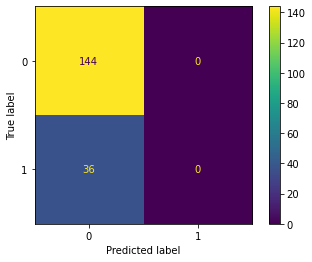

In [23]:
plot_confusion_matrix(model,X_test,y_test)

In [24]:
model.oob_score_

0.8238095238095238

In [25]:
accuracy_score(y_pred,y_test)

0.8

In [26]:
confusion_matrix(y_test,y_pred)

array([[144,   0],
       [ 36,   0]], dtype=int64)

In [27]:
model.feature_importances_

array([0.12, 0.32, 0.2 , 0.18, 0.12, 0.06])

In [28]:
pd.DataFrame(index=X_train.columns, data=model.feature_importances_,columns=['Feature Importance'] ).sort_values(by='Feature Importance')

,Feature Importance
Urban_YES,0.06
Marital.Status,0.12
Undergrad_YES,0.12
Work.Experience,0.18
City.Population,0.20
Taxable.Income,0.32


In [29]:
test_error=[]
for n in range(1,100):
    model= RandomForestClassifier(n_estimators=n,max_leaf_nodes=2, bootstrap=True,oob_score=True, n_jobs=-1, random_state=101)
    model.fit(X_train,y_train)
    test_pred= model.predict(X_test)
    test_error.append(1-accuracy_score(test_pred,y_test))
    

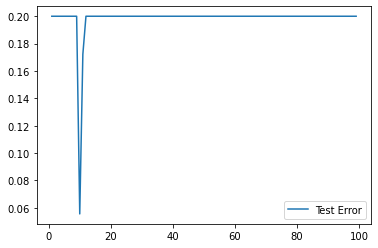

In [30]:
plt.plot(range(1,100),test_error,label='Test Error')
plt.legend()

We can clearly see that by taking no of trees between 0-20 we can gain less test error.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
n_estimators=[10,15,64,100,128,200]
bootstrap = [True,False]
oob_score = [True,False]

In [33]:
param_grid= {'n_estimators':n_estimators,'bootstrap':bootstrap,'oob_score':oob_score}

In [34]:
rfc=RandomForestClassifier()
grid= GridSearchCV(rfc,param_grid=param_grid)

In [35]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 15, 64, 100, 128, 200],
                         'oob_score': [True, False]})

In [36]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 15, 'oob_score': True}

In [37]:
pred= grid.predict(X_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        36

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



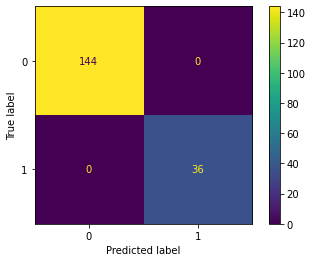

In [39]:
plot_confusion_matrix(grid,X_test,y_test)

In [40]:
grid.best_estimator_.oob_score_

0.9976190476190476

In [41]:
accuracy_score(y_test,pred)

1.0

# Bagged Decision Trees for Classification

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean()) 

0.9976190476190476


# # Random Forest Classification with kfold

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
num_trees = 100
max_features = 6
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean()) 

0.9976190476190476


# # AdaBoost Classification

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
num_trees = 15
seed=7
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())


0.9976190476190476


# # Stacking Ensemble for Classification

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [49]:
kfold = KFold(n_splits=10,shuffle=True, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.9952380952380953


In [50]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]